# Loan Application Status Prediction


## This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 



In [57]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [58]:
df= pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Observations:-
Firstly we observe the dataset: 

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

#### Independent Variables:

- Loan_ID : It shows the unique id.no need of this column 

- Gender : It shows the Gender of the applicant Male/female

- Married: It shows the Marital Status of the applicant, values will be Yes/ No

- Dependents: It tells whether the applicant has any dependents or not.

- Education: It will tell us whether the applicant is Graduated or not.

- Self_Employed: This defines that the applicant is self-employed i.e. Yes/ No

- ApplicantIncome: It shows the Applicant income

- CoapplicantIncome: It shows the CoapplicantIncome. 

- Loan_Amount: It shows the Loan amount (in thousands)

- Loan_Amount_Term : It shows the Terms of loan (in months)

- Credit History:  Credit history of individual’s repayment of their debts

- Property_Area:  Area of property i.e. Rural/Urban/Semi-urban 

#### Dependent Variable (Target Variable):

- Loan_Status: You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 



In [59]:
df.drop('Loan_ID',axis = 1,inplace=True)

In [60]:
# let's check the shape of the dataset
df.shape

(614, 12)

### We have 614 rows and 12 columns

In [61]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [62]:
##Checking Data type of features and label
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


### Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status columns  are having object type values .we will use encoding techniques to handles this situation.

In [63]:
# let's check the missing values of a dataset
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History columns are having null values

### CHECKING DUPLICATES

In [64]:
# let's check the duplicate rows present or not in this dataset
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []


### There is no duplicates present in this dataset


In [65]:
# print all the datatypes and unique values
for column in df.columns:
    if df[column].dtype== object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('---------------------------------------------------------------------------------')

Gender:['Male' 'Female' nan]
Male      489
Female    112
Name: Gender, dtype: int64
---------------------------------------------------------------------------------
Married:['No' 'Yes' nan]
Yes    398
No     213
Name: Married, dtype: int64
---------------------------------------------------------------------------------
Dependents:['0' '1' '2' '3+' nan]
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
---------------------------------------------------------------------------------
Education:['Graduate' 'Not Graduate']
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
---------------------------------------------------------------------------------
Self_Employed:['No' 'Yes' nan]
No     500
Yes     82
Name: Self_Employed, dtype: int64
---------------------------------------------------------------------------------
Property_Area:['Urban' 'Rural' 'Semiurban']
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
--

# EDA

### Visualize the relationship between target and categorical columns 

In [66]:
# print all categorical columns
for column in df.columns:
    if df[column].dtype== object:
        print(str(column))

Gender
Married
Dependents
Education
Self_Employed
Property_Area
Loan_Status


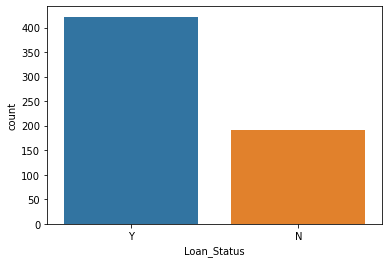

In [67]:
# let's visualize the Attrition
sns.countplot(df['Loan_Status'])
plt.show()

In [68]:
# count the number of applicants are approved or not
print(df['Loan_Status'].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


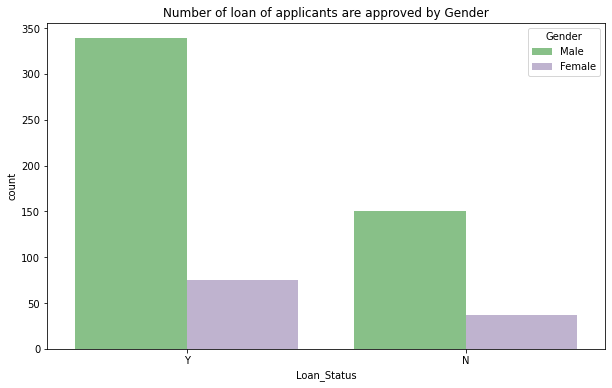

In [69]:
#let's visualize the relationship between Loan_Status and Gender
plt.figure(figsize=(10,6))
sns.countplot(x=df['Loan_Status'],hue='Gender',data=df, palette = 'Accent').set_title("Number of loan of applicants are approved by Gender")
plt.show()

In [70]:
df.groupby('Gender')['Loan_Status'].value_counts()

Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              339
        N              150
Name: Loan_Status, dtype: int64

### As compared to female ,male applicants are more who approved the loan

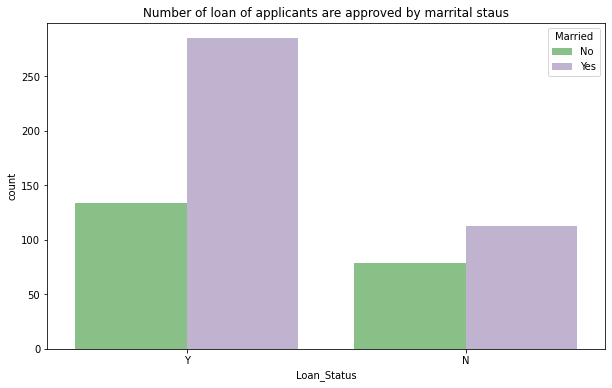

In [71]:
#let's visualize the relationship between Loan_Status and Married
plt.figure(figsize=(10,6))
sns.countplot(x=df['Loan_Status'],hue='Married',data=df, palette = 'Accent').set_title("Number of loan of applicants are approved by marrital staus")
plt.show()

In [72]:
df.groupby('Married')['Loan_Status'].value_counts()

Married  Loan_Status
No       Y              134
         N               79
Yes      Y              285
         N              113
Name: Loan_Status, dtype: int64

### As compared to unmarried applicants ,married applicants are more who approved the loan


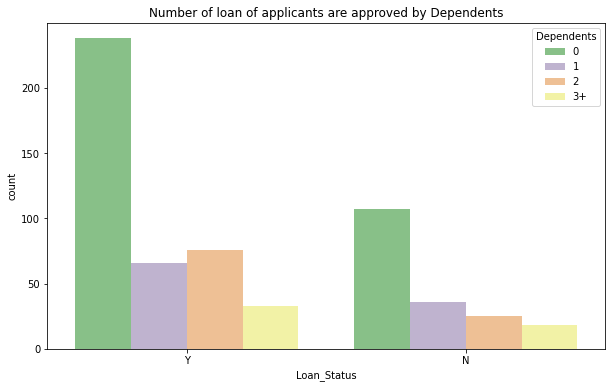

In [73]:
#let's visualize the relationship between Loan_Status and Dependents
plt.figure(figsize=(10,6))
sns.countplot(x=df['Loan_Status'],hue='Dependents',data=df, palette = 'Accent').set_title("Number of loan of applicants are approved by Dependents")
plt.show()

In [74]:
df.groupby('Dependents')['Loan_Status'].value_counts()

Dependents  Loan_Status
0           Y              238
            N              107
1           Y               66
            N               36
2           Y               76
            N               25
3+          Y               33
            N               18
Name: Loan_Status, dtype: int64

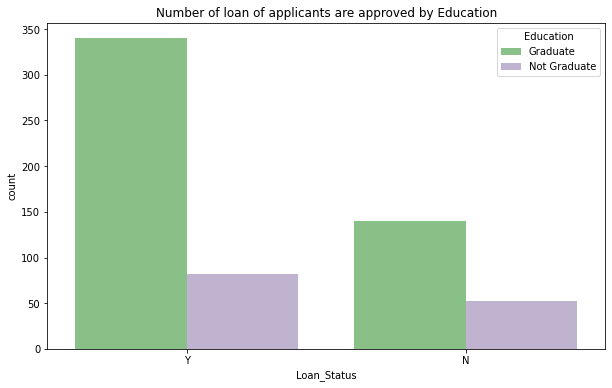

In [75]:
#let's visualize the relationship between Loan_Status and Education
plt.figure(figsize=(10,6))
sns.countplot(x=df['Loan_Status'],hue='Education',data=df, palette = 'Accent').set_title("Number of loan of applicants are approved by Education")
plt.show()

In [76]:
df.groupby('Education')['Loan_Status'].value_counts()

Education     Loan_Status
Graduate      Y              340
              N              140
Not Graduate  Y               82
              N               52
Name: Loan_Status, dtype: int64

### Graduate applicants are more as compared to not graduate 

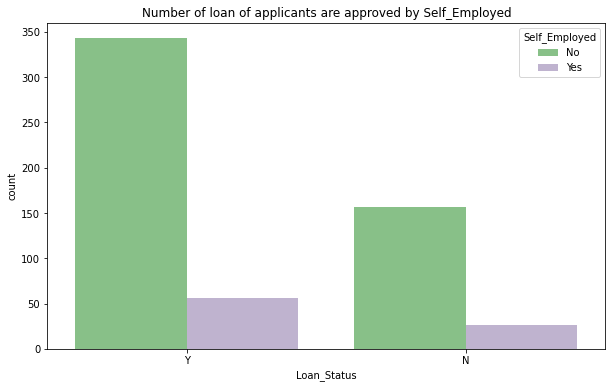

In [77]:
#let's visualize the relationship between Loan_Status and Self_Employed
plt.figure(figsize=(10,6))
sns.countplot(x=df['Loan_Status'],hue='Self_Employed',data=df, palette = 'Accent').set_title("Number of loan of applicants are approved by Self_Employed")
plt.show()

In [78]:
df.groupby('Self_Employed')['Loan_Status'].value_counts()

Self_Employed  Loan_Status
No             Y              343
               N              157
Yes            Y               56
               N               26
Name: Loan_Status, dtype: int64

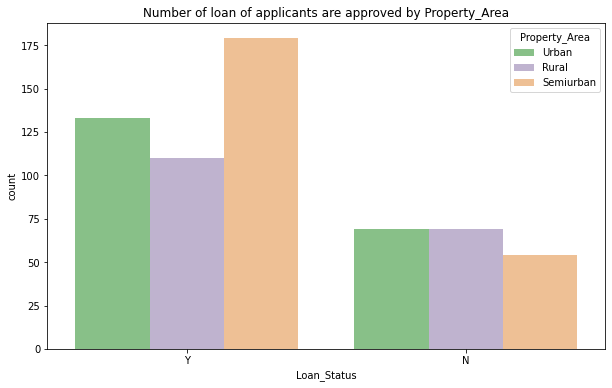

In [79]:
#let's visualize the relationship between Loan_Status and Property_Area
plt.figure(figsize=(10,6))
sns.countplot(x=df['Loan_Status'],hue='Property_Area',data=df, palette = 'Accent').set_title("Number of loan of applicants are approved by Property_Area")
plt.show()

In [80]:
df.groupby('Property_Area')['Loan_Status'].value_counts()

Property_Area  Loan_Status
Rural          Y              110
               N               69
Semiurban      Y              179
               N               54
Urban          Y              133
               N               69
Name: Loan_Status, dtype: int64

### Semiurban area applicants are more as compared to rural and urban area applicants who are approved loan.

### Visualize the relationship between target and continuous data columns 

In [81]:
# print all continuous data columns
for column in df.columns:
    if df[column].dtype != object:
         print(str(column))


ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History


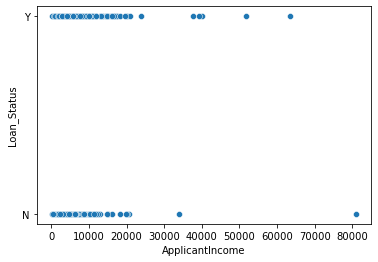

In [82]:
# shows the number of applicants who are approved loan by their ApplicantIncome
sns.scatterplot(x='ApplicantIncome',y = 'Loan_Status',data = df)
plt.show()


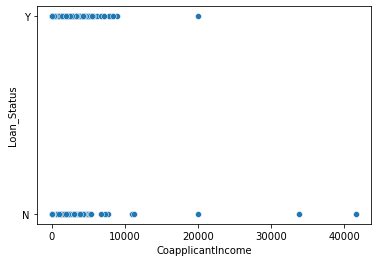

In [83]:
# shows the number of applicants who are approved loan by their CoapplicantIncome
sns.scatterplot(x='CoapplicantIncome',y = 'Loan_Status',data = df)
plt.show()


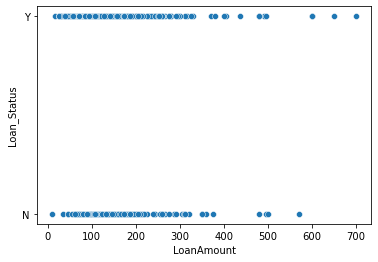

In [84]:
# shows the number of applicants who are approved loan by their LoanAmount
sns.scatterplot(x='LoanAmount',y = 'Loan_Status',data = df)
plt.show()


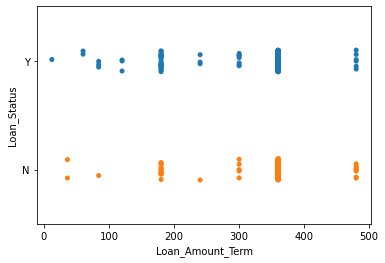

In [85]:
# shows the number of applicants who are approved loan by their Loan_Amount_Term
sns.stripplot(x='Loan_Amount_Term',y = 'Loan_Status',data = df)
plt.show()


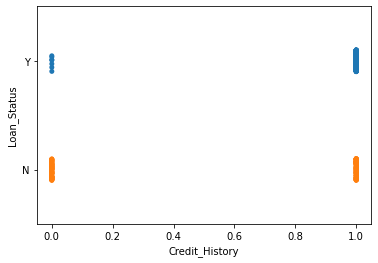

In [86]:
# shows the number of applicants who are approved loan by their Credit_History
sns.stripplot(x='Credit_History',y = 'Loan_Status',data = df)
plt.show()


In [87]:
# converting text into numbers using label encoder
from sklearn.preprocessing import LabelEncoder
cat=[i for i in df.columns if df[i].dtypes=='O']
enc = LabelEncoder()
for i in cat:
    df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [88]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [89]:
# let's treat with nulls
for col in df.columns:
    df[col] = df[col].fillna(df[col].mean()) 

In [90]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [91]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [92]:
# stats about data
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.838762,0.657980,0.842020,0.218241,0.237785,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.421752,0.484971,1.120531,0.413389,0.534737,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


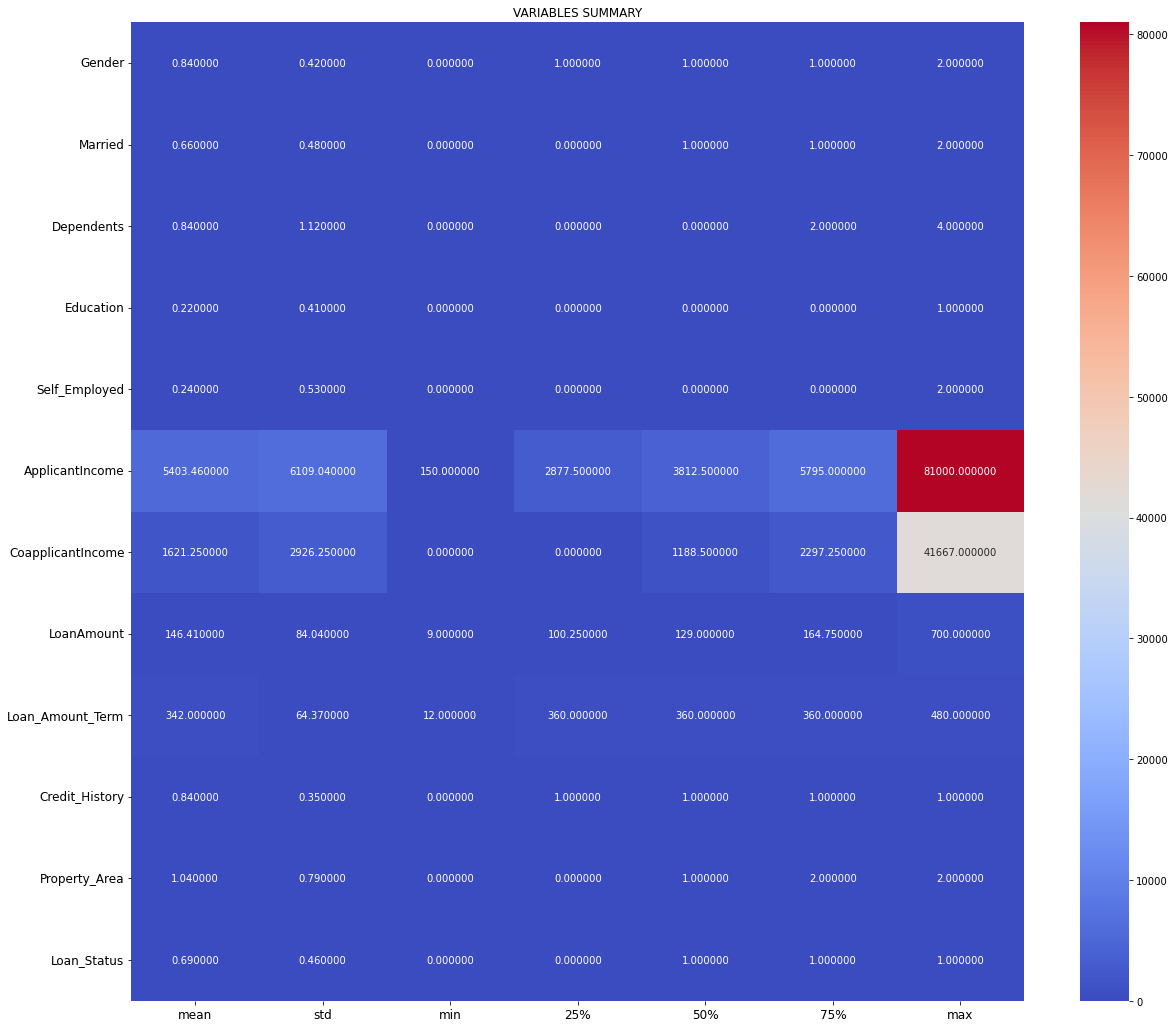

In [93]:
df.describe()
plt.figure(figsize=(20,18))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,fmt='f',cmap='coolwarm')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("VARIABLES SUMMARY")
plt.show()

## Observations:-
- In variable summery ApplicantIncome and CoapplicantIncome indicating the presence of outliers
- LoanAmount is also indicating the presence of outliers.
- Most of the features are having categorical type data

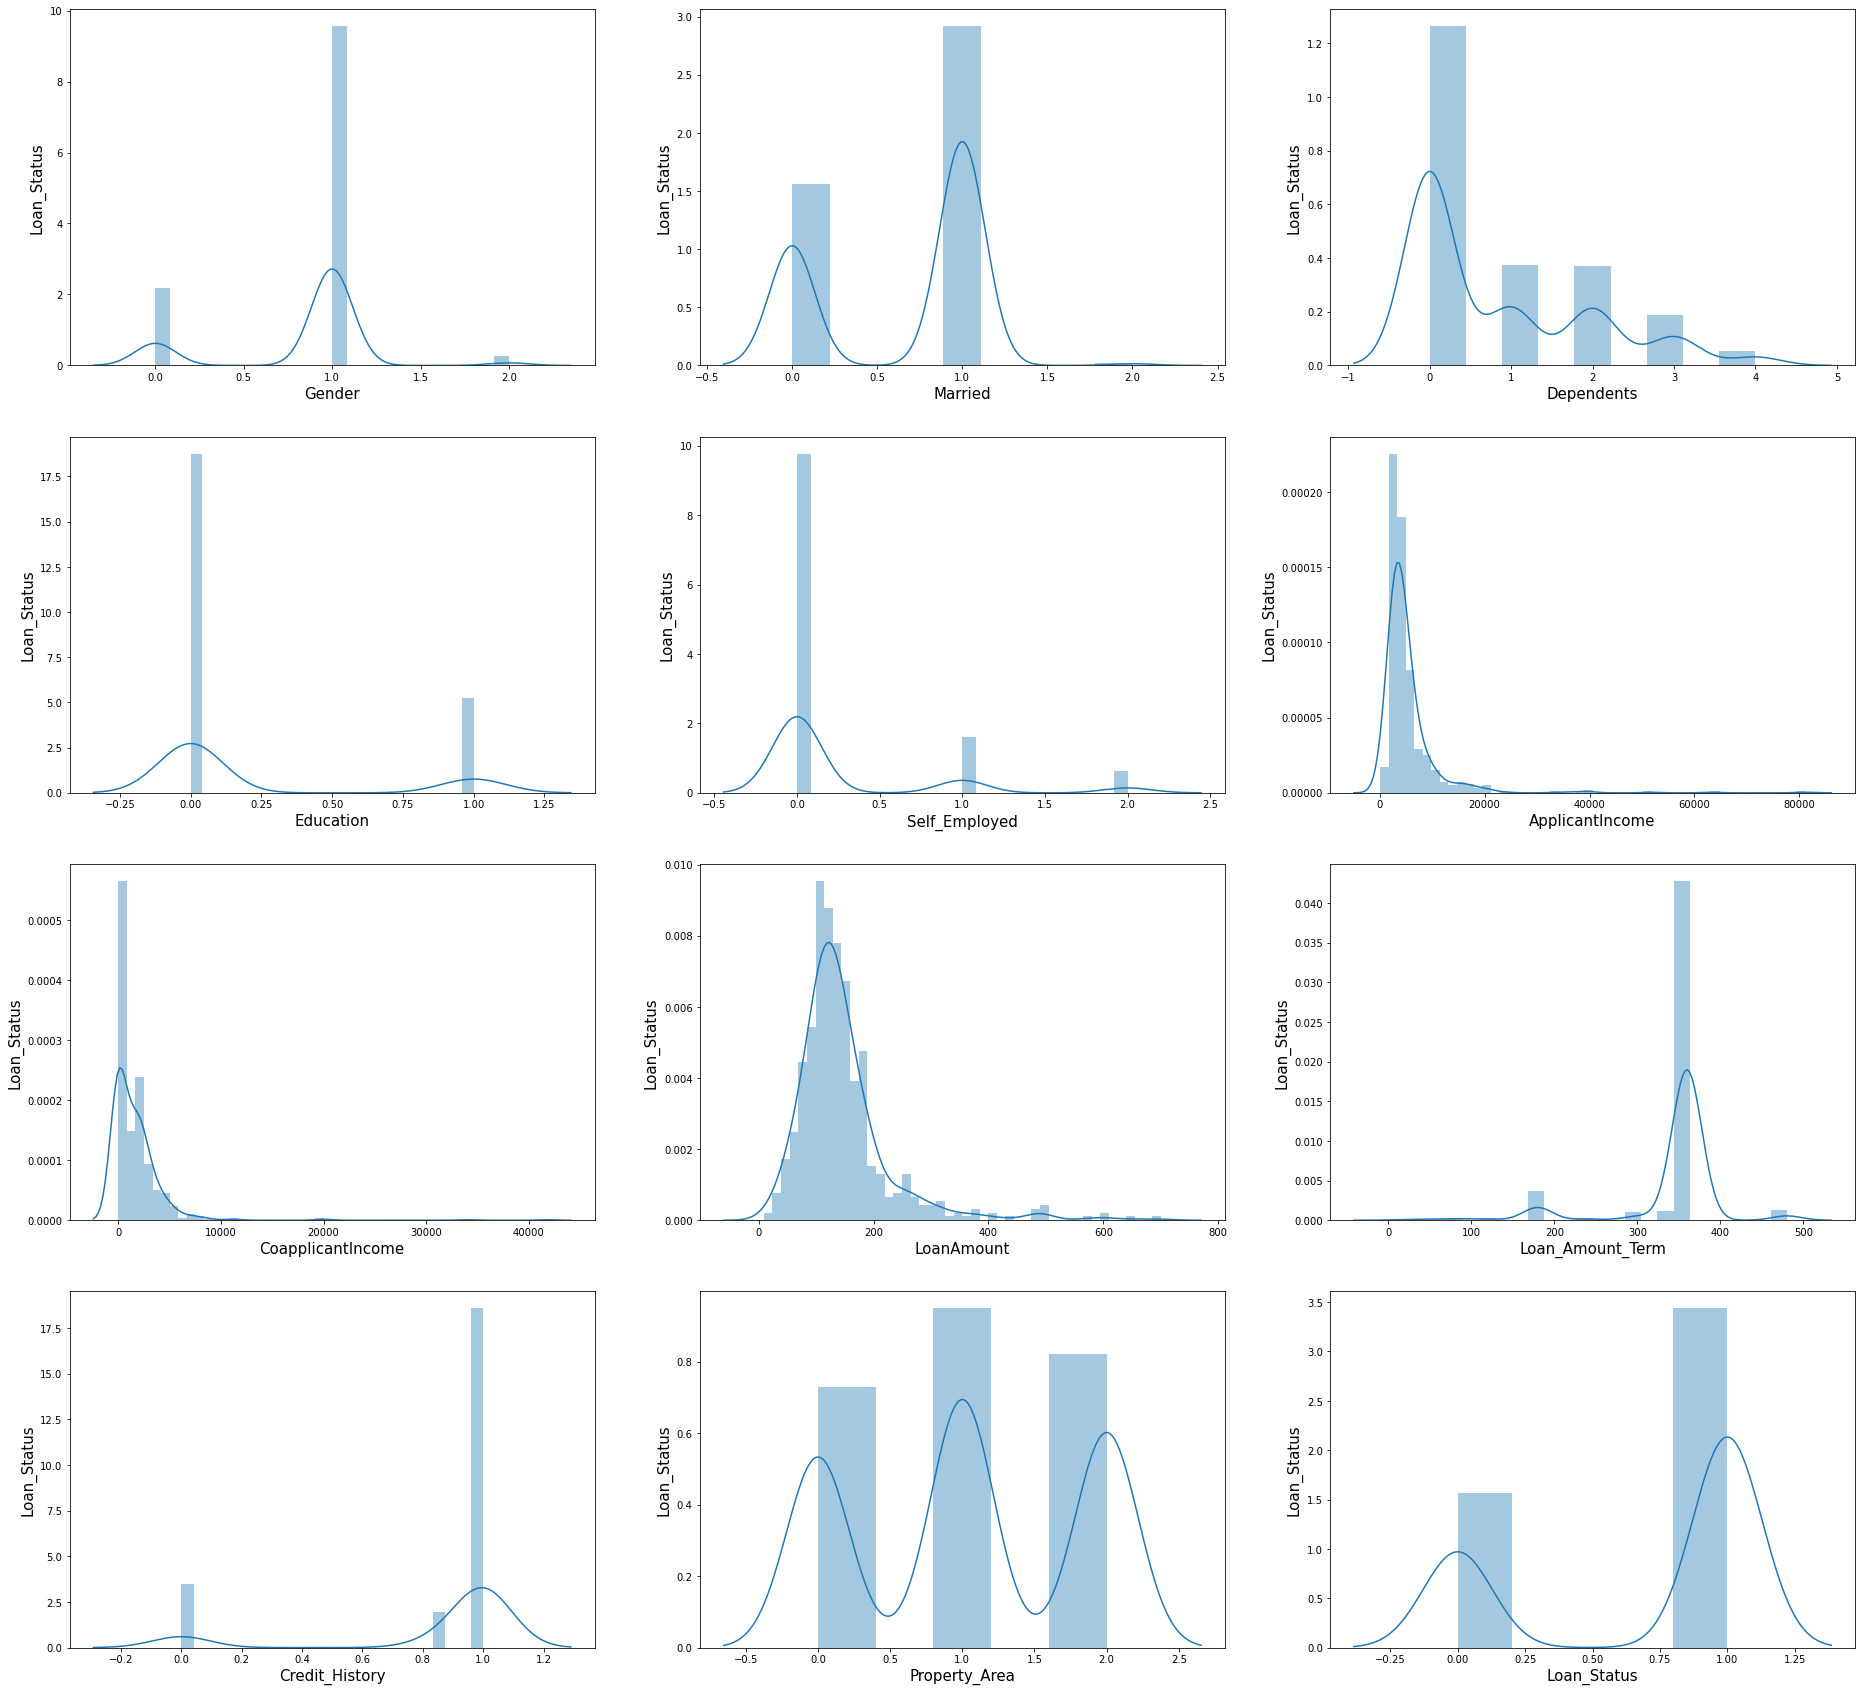

In [94]:
# let's visualize the data using distribution plot
plt.figure(figsize=(32,38))
pn = 1
for col in df:
    if pn <= 13:
        ax = plt.subplot(5,3,pn)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize = 15)
        plt.ylabel('Loan_Status',fontsize = 15)
    pn +=1
plt.show()    

## Observations:-
### most of the features are having categorical values and ApplicantIncome,CoapplicantIncome and LoanAmount are showing outliers 

## Checking Outliers

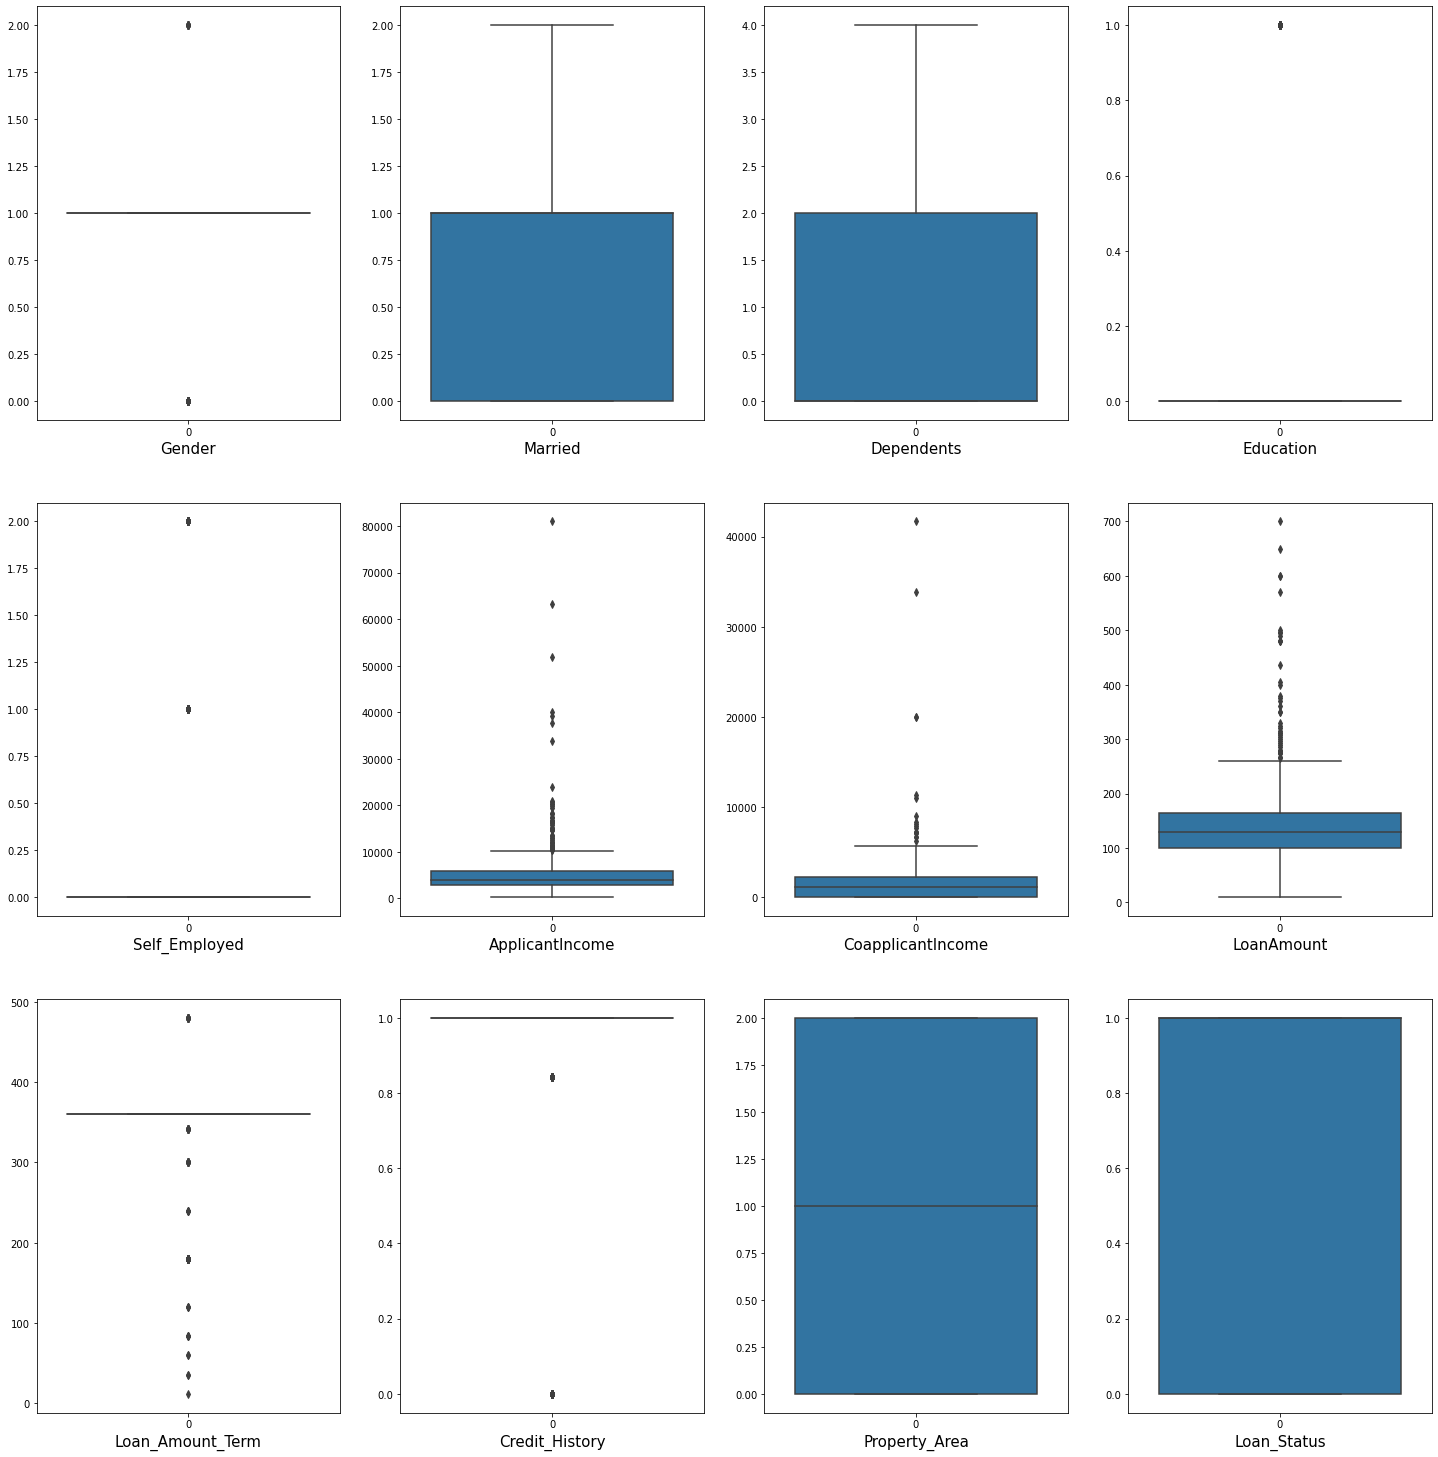

In [95]:
plt.figure(figsize=(25,35))
pn = 1
for col in df:
    if pn <= 13:
        ax = plt.subplot(4,4,pn)
        sns.boxplot(data=df[col])
        plt.xlabel(col,fontsize = 15)
    pn +=1
plt.show()    

### as per my observation,  ApplicantIncome,CoapplicantIncome and LoanAmount are indicating the presence of outliers. we will remove the outliers by using zscore technique 

## Removing Outliers


In [96]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (548, 12)
Percentage of data loss post outlier removal:  10.749185667752444


## Correlation

In [97]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.345894,0.158556,0.034202,0.023744,0.026755,0.189977,0.159188,-0.097345,0.007141,-0.033569,0.011524
Married,0.345894,1.000000,0.339199,0.023781,-0.023110,0.000328,0.220988,0.169818,-0.130005,0.026943,0.015007,0.102595
Dependents,0.158556,0.339199,1.000000,0.077201,0.039380,0.088208,-0.047031,0.119121,-0.066204,-0.054665,0.030939,-0.005975
Education,0.034202,0.023781,0.077201,1.000000,-0.008337,-0.168418,-0.042460,-0.150237,-0.105447,-0.087402,-0.050318,-0.103196
Self_Employed,0.023744,-0.023110,0.039380,-0.008337,1.000000,0.248058,-0.040733,0.120558,-0.034400,-0.009342,-0.030009,-0.025740
ApplicantIncome,0.026755,0.000328,0.088208,-0.168418,0.248058,1.000000,-0.213538,0.443894,-0.053087,0.053089,-0.009007,0.007848
CoapplicantIncome,0.189977,0.220988,-0.047031,-0.042460,-0.040733,-0.213538,1.000000,0.314699,-0.072115,-0.023867,-0.099388,0.038806
LoanAmount,0.159188,0.169818,0.119121,-0.150237,0.120558,0.443894,0.314699,1.000000,0.030579,0.007955,-0.093593,-0.027363
Loan_Amount_Term,-0.097345,-0.130005,-0.066204,-0.105447,-0.034400,-0.053087,-0.072115,0.030579,1.000000,0.033791,-0.061149,-0.011024
Credit_History,0.007141,0.026943,-0.054665,-0.087402,-0.009342,0.053089,-0.023867,0.007955,0.033791,1.000000,-0.005438,0.567327


In [98]:
# let's check the correation with Loan_status
df.corr()['Loan_Status'].sort_values


<bound method Series.sort_values of Gender               0.011524
Married              0.102595
Dependents          -0.005975
Education           -0.103196
Self_Employed       -0.025740
ApplicantIncome      0.007848
CoapplicantIncome    0.038806
LoanAmount          -0.027363
Loan_Amount_Term    -0.011024
Credit_History       0.567327
Property_Area        0.028109
Loan_Status          1.000000
Name: Loan_Status, dtype: float64>

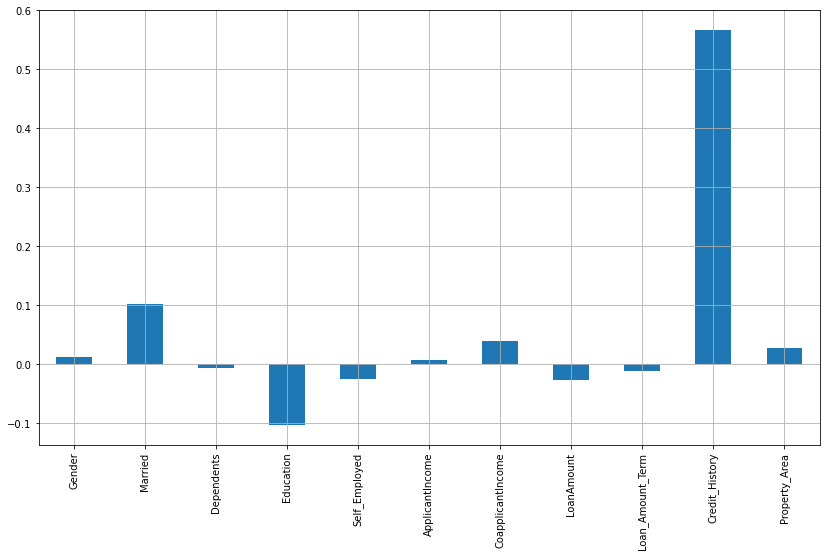

In [99]:
df.drop('Loan_Status',axis=1).corrwith(df.Loan_Status).plot(kind='bar',grid=True,figsize=(14,8))
plt.show()

<AxesSubplot:>

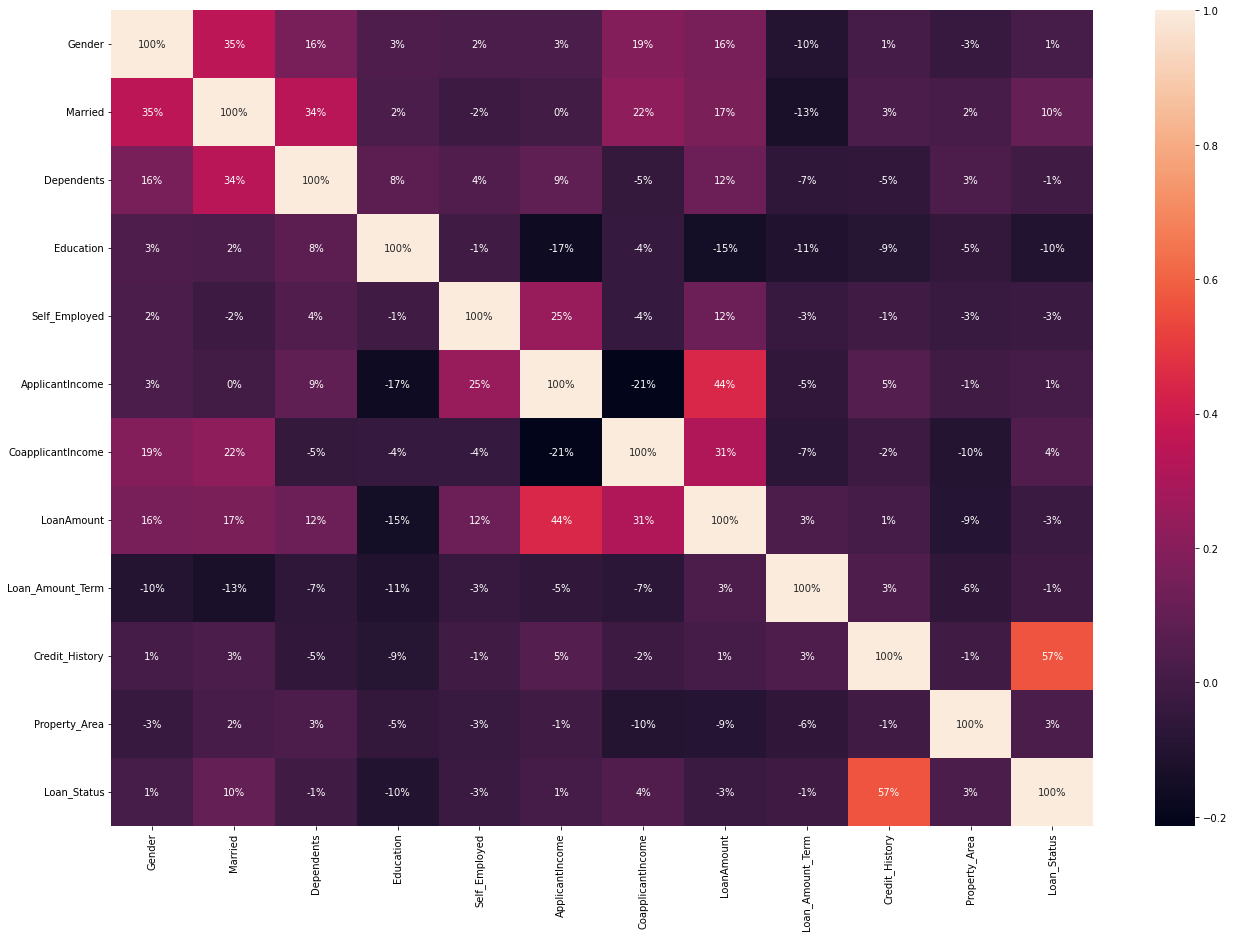

In [100]:
# let's check correlation using heatmap
plt.figure(figsize=(22,15))
sns.heatmap(df.corr(),annot =True,fmt  = '.0%')

## Obserrvations:-
- Dependents,Education,Self_Employed,LoanAmount and LoanAmount _term are negatively correlated with target.
- Gender,Married,ApplicanIncome,CoapplicanIncome,Credit_History and Property_Area are positively correlated with target variable
- There is no multicollinearity problem exist in  this dataset. 
- maximum correlation : Credit_History 
- minimum correlation : ApplicanIncome                              
                                  

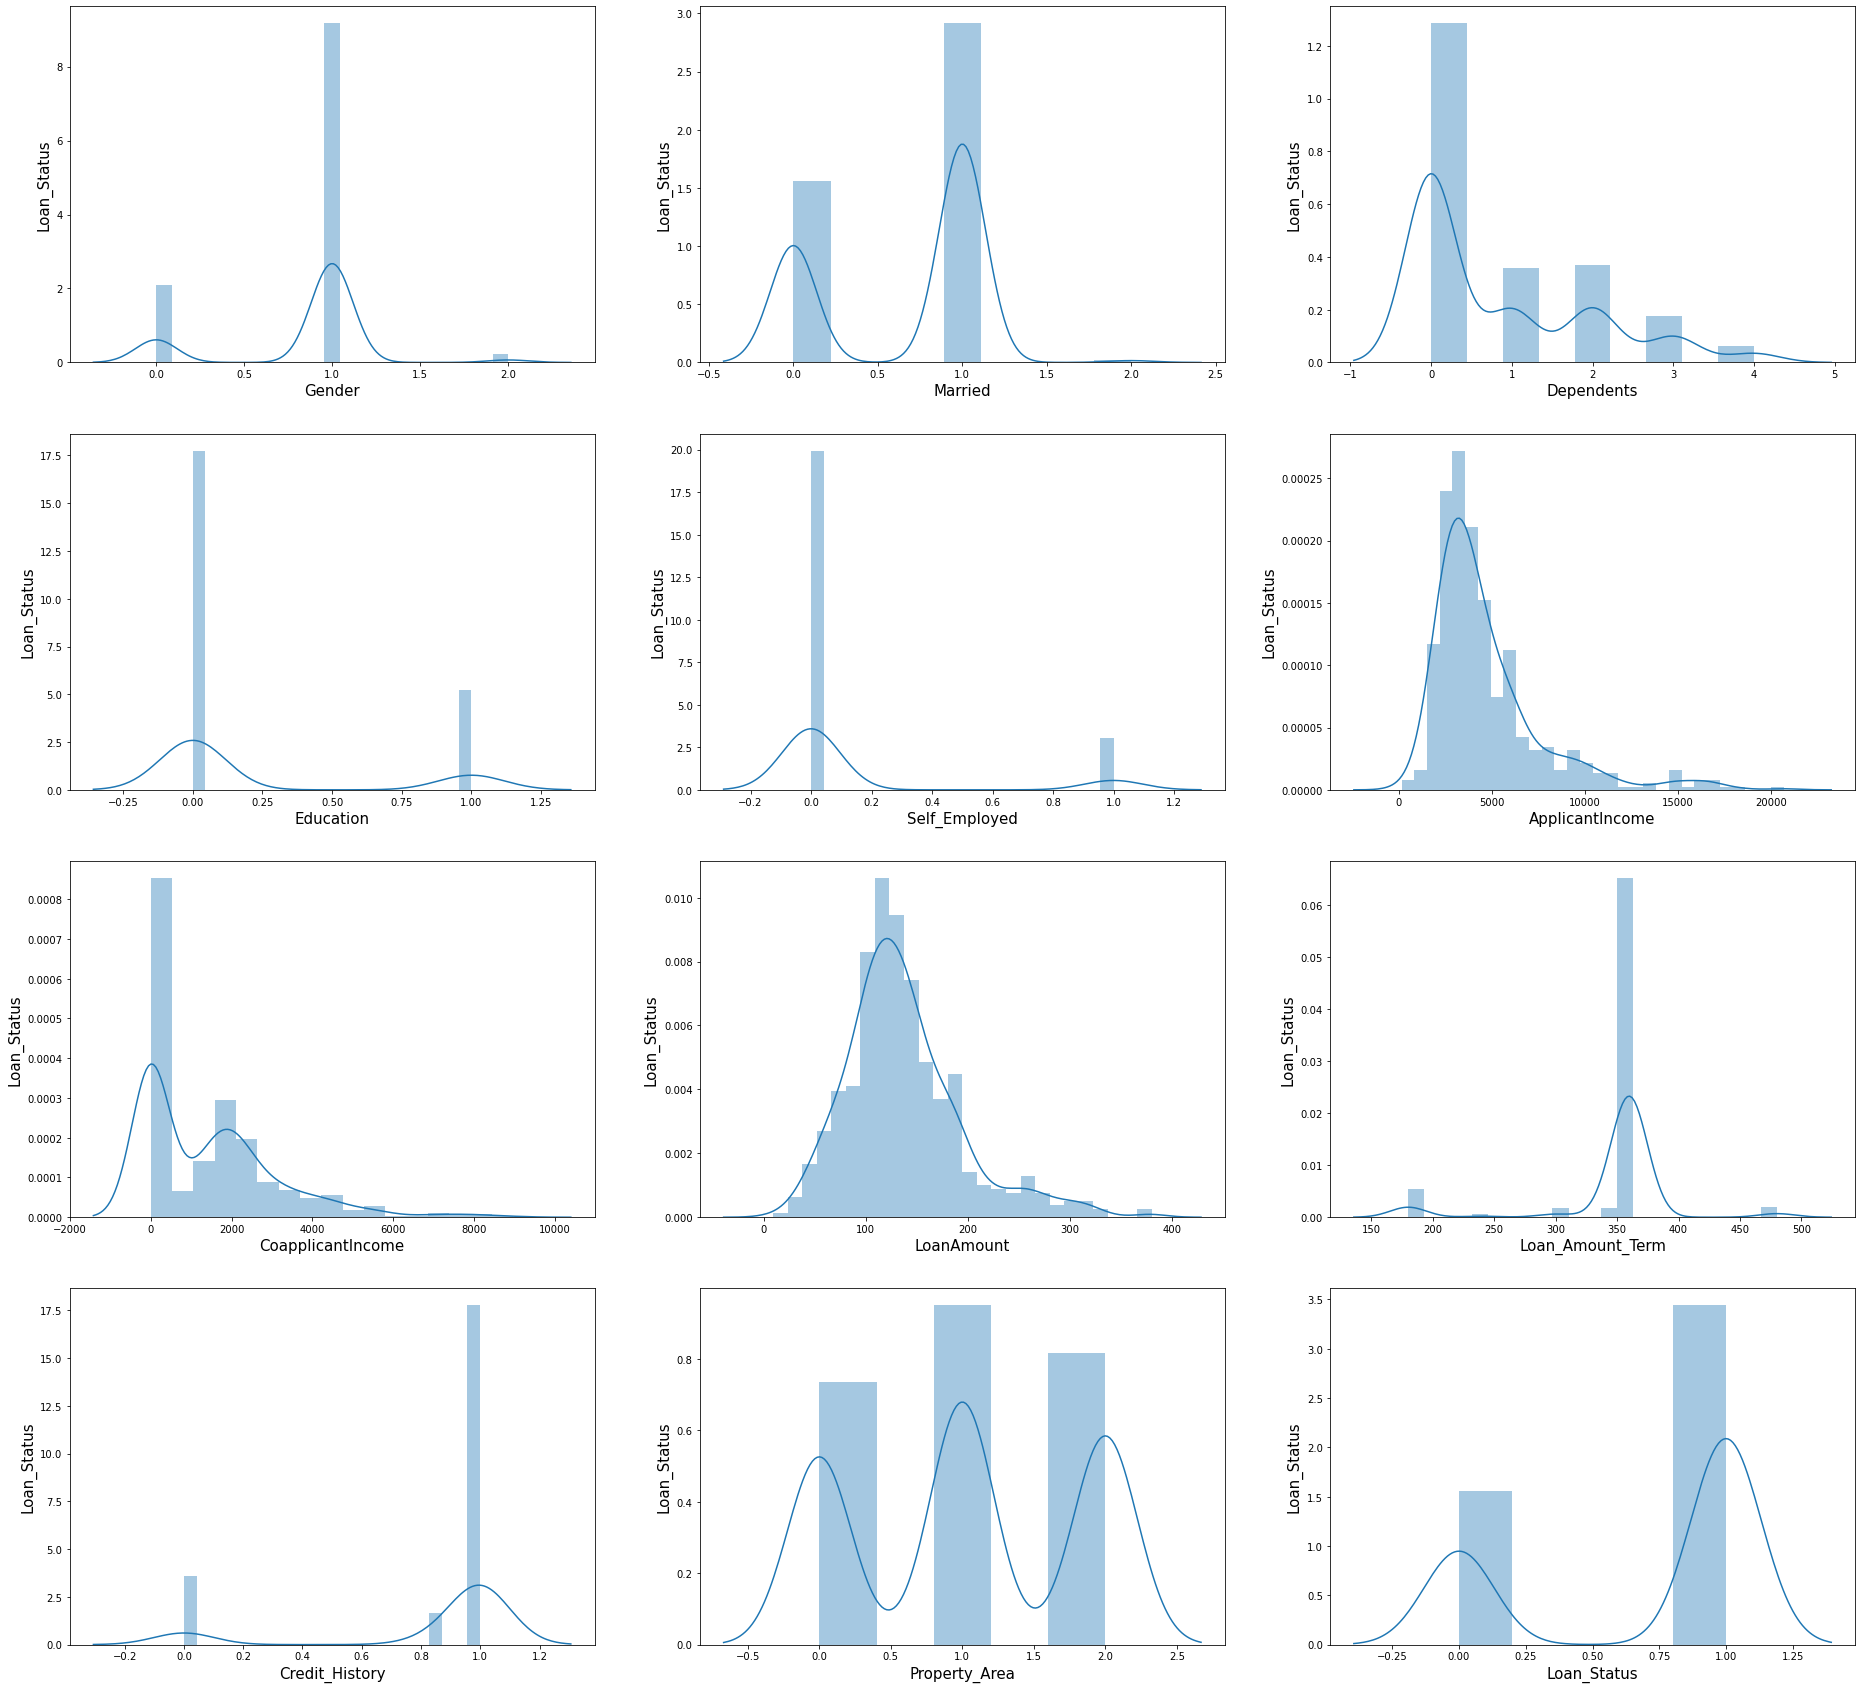

In [101]:
# let's visualize the data after removing outliers
plt.figure(figsize=(32,38))
pn = 1
for col in df:
    if pn <= 13:
        ax = plt.subplot(5,3,pn)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize = 15)
        plt.ylabel('Loan_Status',fontsize = 15)
    pn +=1
plt.show()    

 ### data is distributted normally but some features are having  skewness

### Skewness

In [102]:
df.skew()

Gender              -0.980211
Married             -0.527102
Dependents           1.126463
Education            1.299518
Self_Employed        2.164757
ApplicantIncome      2.115295
CoapplicantIncome    1.369775
LoanAmount           1.103178
Loan_Amount_Term    -2.029308
Credit_History      -1.862149
Property_Area       -0.058055
Loan_Status         -0.813560
dtype: float64

## Dividing data in features and label

In [103]:
x = df.drop('Loan_Status',axis = 1)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [104]:
y=df['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 548, dtype: int32

### Removal of skewness using Power Transformer as values are negative we are using 'yeo-johnson' method for removing skewness

In [105]:
from sklearn.preprocessing import PowerTransformer
p_transform = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(p_transform.fit_transform(x), columns=x.columns)
x.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.313808,-1.333783,-0.849298,-0.543607,-0.392026,0.679977,-1.115602,0.306603,0.140492,0.517251,1.197129
1,0.313808,0.680995,0.761110,-0.543607,-0.392026,0.236773,0.751130,-0.022081,0.140492,0.517251,-1.345445
2,0.313808,0.680995,-0.849298,-0.543607,2.550853,-0.534370,-1.115602,-1.436126,0.140492,0.517251,1.197129
3,0.313808,0.680995,-0.849298,1.839565,-0.392026,-0.807085,0.900220,-0.174579,0.140492,0.517251,1.197129
4,0.313808,-1.333783,-0.849298,-0.543607,-0.392026,0.726262,-1.115602,0.212943,0.140492,0.517251,1.197129
5,0.313808,0.680995,1.246172,-0.543607,2.550853,0.540614,1.099707,1.977036,0.140492,0.517251,1.197129
6,0.313808,0.680995,-0.849298,1.839565,-0.392026,-0.992686,0.752867,-0.698961,0.140492,0.517251,1.197129
7,0.313808,0.680995,1.474098,-0.543607,-0.392026,-0.512641,0.920628,0.499764,0.140492,-2.192190,0.011204
8,0.313808,0.680995,1.246172,-0.543607,-0.392026,-0.007943,0.755025,0.659121,0.140492,0.517251,1.197129
9,0.313808,0.680995,1.246172,-0.543607,-0.392026,-0.416823,0.506236,-1.323289,0.140492,0.517251,1.197129


In [106]:
pd.DataFrame(x).skew().sort_values()

Credit_History      -1.570569
Married             -0.297022
CoapplicantIncome   -0.179965
Property_Area       -0.155584
ApplicantIncome     -0.002193
LoanAmount           0.046099
Gender               0.230693
Dependents           0.403504
Loan_Amount_Term     0.691327
Education            1.299518
Self_Employed        2.164757
dtype: float64

### Every value will be reduced after transformation

In [107]:
# data scaling formula z = (x-mean)/std
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)
x_scaled

array([[ 0.31380803, -1.33378288, -0.8492977 , ...,  0.14049153,
         0.5172507 ,  1.19712929],
       [ 0.31380803,  0.68099491,  0.76111017, ...,  0.14049153,
         0.5172507 , -1.34544474],
       [ 0.31380803,  0.68099491, -0.8492977 , ...,  0.14049153,
         0.5172507 ,  1.19712929],
       ...,
       [ 0.31380803,  0.68099491,  0.76111017, ...,  0.14049153,
         0.5172507 ,  1.19712929],
       [ 0.31380803,  0.68099491,  1.24617213, ...,  0.14049153,
         0.5172507 ,  1.19712929],
       [-1.81208962, -1.33378288, -0.8492977 , ...,  0.14049153,
        -2.19219037,  0.01120413]])

## Final features Multi-Collinearity Check using VIF**

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features List"]=x.columns
vif_data["VIF Value"]=[variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
vif_data

,Features List,VIF Value
0,Gender,1.143458
1,Married,1.397660
2,Dependents,1.223576
3,Education,1.066474
4,Self_Employed,1.055914
5,ApplicantIncome,1.754200
6,CoapplicantIncome,1.543921
7,LoanAmount,1.571337
8,Loan_Amount_Term,1.046270
9,Credit_History,1.017925


### There is no sign of Multi-collinearity

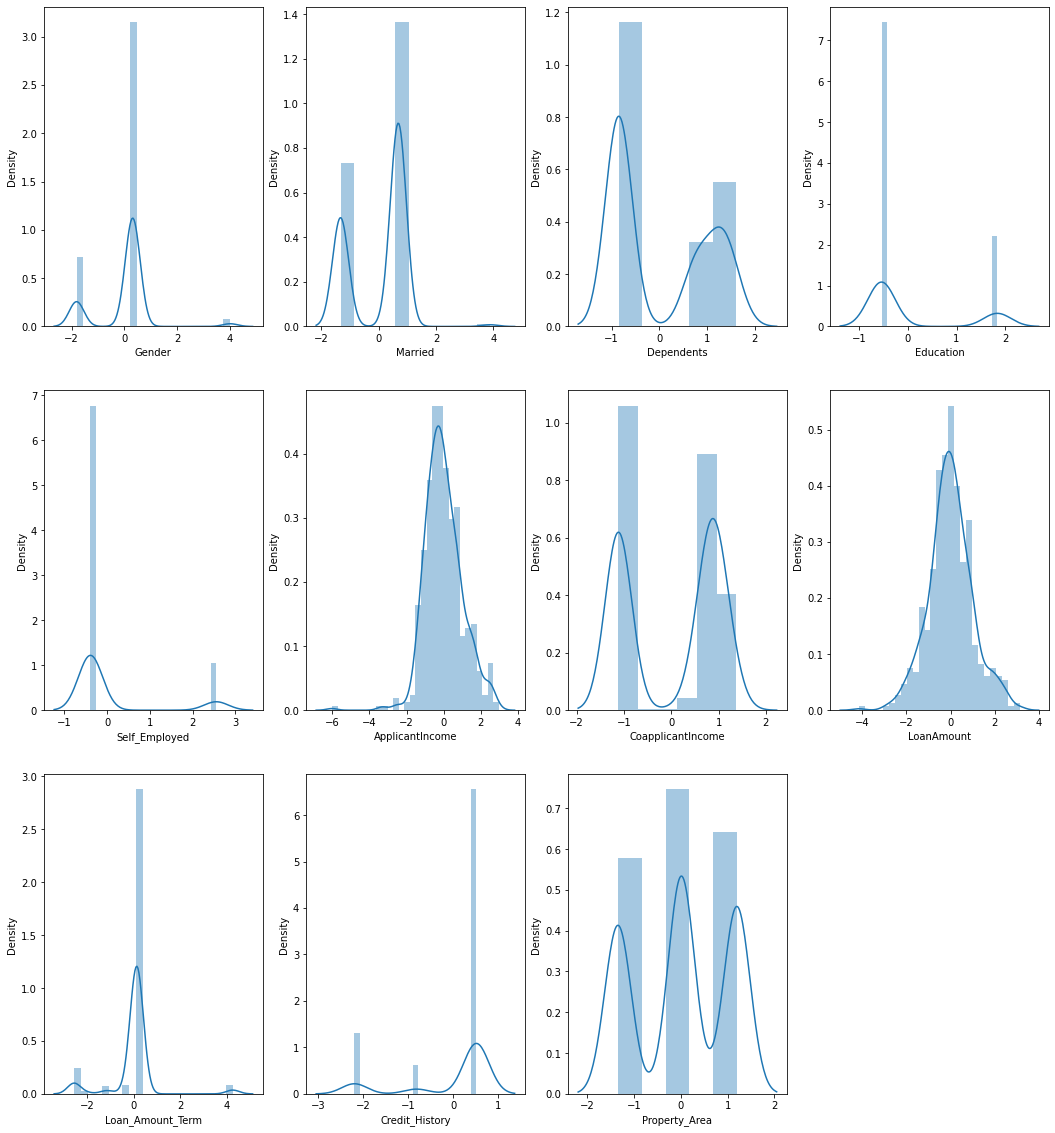

In [109]:
# let's visualize the data after correcting skewness
plt.figure(figsize=(18,20))
plotnumber=1
for column in x:
    if plotnumber<=12:
        plt.subplot(3,4,plotnumber)
        ax=sns.distplot(x[column])
        
    plotnumber+=1
    
plt.show()    

### Skewness has been corrected and data is distributed normally

# Model Building


In [112]:
# lets import all necessary libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score,accuracy_score

## Best Random State

In [170]:
maxAccu=0
maxRS=0

for i in range(1, 500):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(X_train, Y_train)
    pred = dt.predict(X_test)
    acc = accuracy_score(Y_test, pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 0.8272727272727273 on Random State 358


In [117]:
from sklearn.model_selection import cross_val_score

In [114]:
# create empty lits
accur_score=[]
c_v_score=[]
diff=[]

In [118]:
# classification model Function
def classify(model,x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20,random_state = 95)
    # training the model
    model.fit(x_train,y_train)
    
    # predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy score
    acc_score=(accuracy_score(y_test,pred))*100
    accur_score.append(acc_score)
    print('Accuracy score',acc_score)
    
    # Classification report
    class_report=classification_report(y_test,pred)
    print('\nClassification Report:\n',class_report)
    
    # Cross validation score
    cv_score=(cross_val_score(model,x,y,cv=15).mean())*100
    c_v_score.append(cv_score)
    print('Cross validation score',cv_score)
    
    # result of accuracy score minus cv_score
    result = acc_score-cv_score
    diff.append(result)
    print('\n Accuracy score - cross val score is:',result)


## Logistic regression


In [119]:
model=LogisticRegression()
classify(model,x,y)

Accuracy score 83.63636363636363

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.57      0.65        30
           1       0.85      0.94      0.89        80

    accuracy                           0.84       110
   macro avg       0.81      0.75      0.77       110
weighted avg       0.83      0.84      0.83       110

Cross validation score 79.97497497497496

 Accuracy score - cross val score is: 3.6613886613886706


### After setting the random state = 95 , We got the accuracy score is 83%


## KNN

In [202]:
model = KNeighborsClassifier()
classify(model,x,y)

Accuracy score 87.27272727272727

Classification Reort:
               precision    recall  f1-score   support

           0       0.67      0.53      0.59        19
           1       0.91      0.95      0.92        91

    accuracy                           0.87       110
   macro avg       0.79      0.74      0.76       110
weighted avg       0.86      0.87      0.87       110

Cross validation score 77.05205205205206

 Accuracy score - cross val score is: 10.220675220675204


### After setting the random state = 490 , We got the accuracy score is 87%


## Random Forest

In [203]:
model =RandomForestClassifier()
classify(model,x,y)

Accuracy score 90.9090909090909

Classification Reort:
               precision    recall  f1-score   support

           0       0.76      0.68      0.72        19
           1       0.94      0.96      0.95        91

    accuracy                           0.91       110
   macro avg       0.85      0.82      0.83       110
weighted avg       0.91      0.91      0.91       110

Cross validation score 80.50050050050052

 Accuracy score - cross val score is: 10.408590408590385


### After setting the random state = 490 , We got the accuracy score is 90%


## AdaBoost

In [205]:
model=AdaBoostClassifier()
classify(model,x,y)

Accuracy score 89.0909090909091

Classification Reort:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.93      0.93      0.93        81

    accuracy                           0.89       110
   macro avg       0.86      0.86      0.86       110
weighted avg       0.89      0.89      0.89       110

Cross validation score 79.5945945945946

 Accuracy score - cross val score is: 9.496314496314497


### After setting the random state = 87 , We got the accuracy score is 89%


## Decision tree

In [207]:
model=DecisionTreeClassifier()
classify(model,x,y)

Accuracy score 80.9090909090909

Classification Reort:
               precision    recall  f1-score   support

           0       0.60      0.67      0.63        27
           1       0.89      0.86      0.87        83

    accuracy                           0.81       110
   macro avg       0.74      0.76      0.75       110
weighted avg       0.82      0.81      0.81       110

Cross validation score 71.94694694694694

 Accuracy score - cross val score is: 8.96214396214397


### After setting the random state = 358 , We got the accuracy score is 80%


## Compare the models


In [208]:
# create a list of labels of build models
label = ['LogisticRegression','KNN','Random Forest','AdaBoost','Decision Tree']
print(label)
print(accur_score)
print(c_v_score)
print(diff)


['LogisticRegression', 'KNN', 'Random Forest', 'AdaBoost', 'Decision Tree']
[83.63636363636363, 87.27272727272727, 90.9090909090909, 89.0909090909091, 80.9090909090909]
[79.97497497497496, 77.05205205205206, 80.50050050050052, 79.5945945945946, 71.94694694694694]
[3.6613886613886706, 10.220675220675204, 10.408590408590385, 9.496314496314497, 8.96214396214397]


In [209]:
# create dataframe
score_df = pd.DataFrame({'Model name':label,'Accuracy Score':accur_score,'Cross validation Score':c_v_score,'Difference':diff})
score_df

,Model name,Accuracy Score,Cross validation Score,Difference
0,LogisticRegression,83.636364,79.974975,3.661389
1,KNN,87.272727,77.052052,10.220675
2,Random Forest,90.909091,80.500501,10.408590
3,AdaBoost,89.090909,79.594595,9.496314
4,Decision Tree,80.909091,71.946947,8.962144


 ###  as per my observation , I choose LogisticRegression as the best model and model accuracy and cross val score difference  is also least.


## HYPERPARAMETER TUNING

In [210]:
lr=LogisticRegression()


In [211]:
params = {
    'n_jobs':[50,60],
    'max_iter':[100],
    'fit_intercept':[True,False],
    'random_state':[30,40,50],
    'dual':[True,False]       }

In [212]:
grd = GridSearchCV(lr,param_grid = params)
grd.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'dual': [True, False], 'fit_intercept': [True, False],
                         'max_iter': [100], 'n_jobs': [50, 60],
                         'random_state': [30, 40, 50]})

In [213]:
lr = grd.best_estimator_
lr.fit(x_train,y_train)

LogisticRegression(n_jobs=50, random_state=30)

In [214]:
pred = lr.predict(x_test)
accuracy_score(y_test,pred)

0.8545454545454545

## ROC AUC Curve

In [215]:
from sklearn.metrics import plot_roc_curve

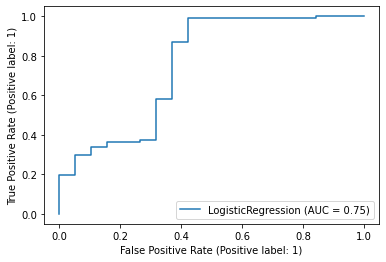

In [219]:
plot_roc_curve(lr,x_test,y_test)
plt.show()

# save the final model


In [220]:
import joblib
joblib.dump(lr,'Loan Application status.pkl')

['Loan Application status.pkl']